In [75]:
import sys

sys.path.append("..")
from dataclasses import asdict, is_dataclass

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from ipywidgets import interact

from calibration.feature_detector.visualization import show_boards, show_corners
from calibration.projector.board import gen_checkerboard_grid
from dacite import from_dict

# pio.renderers.default = "svg"
from calibration.projector.projector import Projector
from calibration.solver.solve import solve

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
df = pd.read_pickle("../babelcalib_results.pkl")

In [70]:
df.columns

Index(['input.ds_name', 'input.subds_name', 'input.name', 'input.width',
       'input.height', 'input.num_corners', 'input.encoding', 'input.corners',
       'input.image', 'features.board', 'features.corners', 'prediction.R',
       'prediction.t', 'prediction.lambdas', 'prediction.camera.focal_length',
       'prediction.camera.sensor_size', 'prediction.camera.resolution',
       'prediction.camera.skew', 'error'],
      dtype='object')

In [56]:
df['input.width'].value_counts()

input.width
1280    937
640     217
346     200
752      73
512      50
1680     50
1024     23
748      16
1032     15
3840     11
Name: count, dtype: int64

In [ ]:
df.describe(include="all")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   input.ds_name                   1592 non-null   object 
 1   input.subds_name                1592 non-null   object 
 2   input.name                      1592 non-null   object 
 3   input.width                     1592 non-null   int64  
 4   input.height                    1592 non-null   int64  
 5   input.num_corners               1592 non-null   int64  
 6   input.encoding                  1592 non-null   object 
 7   input.corners                   1592 non-null   object 
 8   input.image                     1592 non-null   object 
 9   features.board                  823 non-null    object 
 10  features.corners                823 non-null    object 
 11  prediction.R                    823 non-null    object 
 12  prediction.t                    82

In [72]:
df[~df["error"].isna()]["error"]

220      -1.000000
328     367.769585
345     363.132305
386     291.962872
400     422.021441
           ...    
1587     -1.000000
1588     -1.000000
1589    442.387686
1590    331.745566
1591     -1.000000
Name: error, Length: 823, dtype: float64

In [73]:
df[~df["error"].isna()]["error"].sort_values()

220       -1.000000
831       -1.000000
827       -1.000000
816       -1.000000
815       -1.000000
           ...     
1541    1903.911875
1544    2048.941944
1538    2080.668469
1542    2227.683452
1545    2412.941743
Name: error, Length: 823, dtype: float64

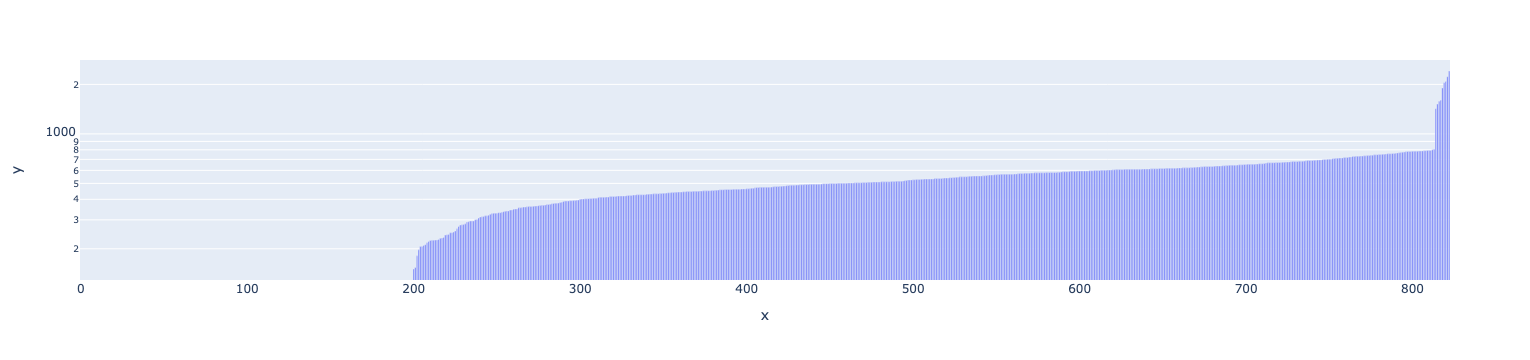

In [74]:
errors = df[~df["error"].isna()]["error"].sort_values()
px.bar(y=errors, hover_name=errors.index, log_y=True)

In [78]:
el.index

Index(['input.ds_name', 'input.subds_name', 'input.name', 'input.width',
       'input.height', 'input.num_corners', 'input.encoding', 'input.corners',
       'input.image', 'features.board', 'features.corners', 'prediction.R',
       'prediction.t', 'prediction.lambdas', 'prediction.camera.focal_length',
       'prediction.camera.sensor_size', 'prediction.camera.resolution',
       'prediction.camera.skew', 'error'],
      dtype='object')

In [68]:
el = df.loc[734]
proj = from_dict(el)
px.scatter(el['prediction.projector'])

KeyError: 'prediction.projector'

In [57]:
@interact
def f(i=(0, 823)):
    el = df_.iloc[i]
    return show_boards(
        el["input.image"], el["features.corners"], el["features.board"]
    ).update_layout(title=f"{i}, error={el['error']}", height=800);

interactive(children=(IntSlider(value=411, description='i', max=823), Output()), _dom_classes=('widget-interac…

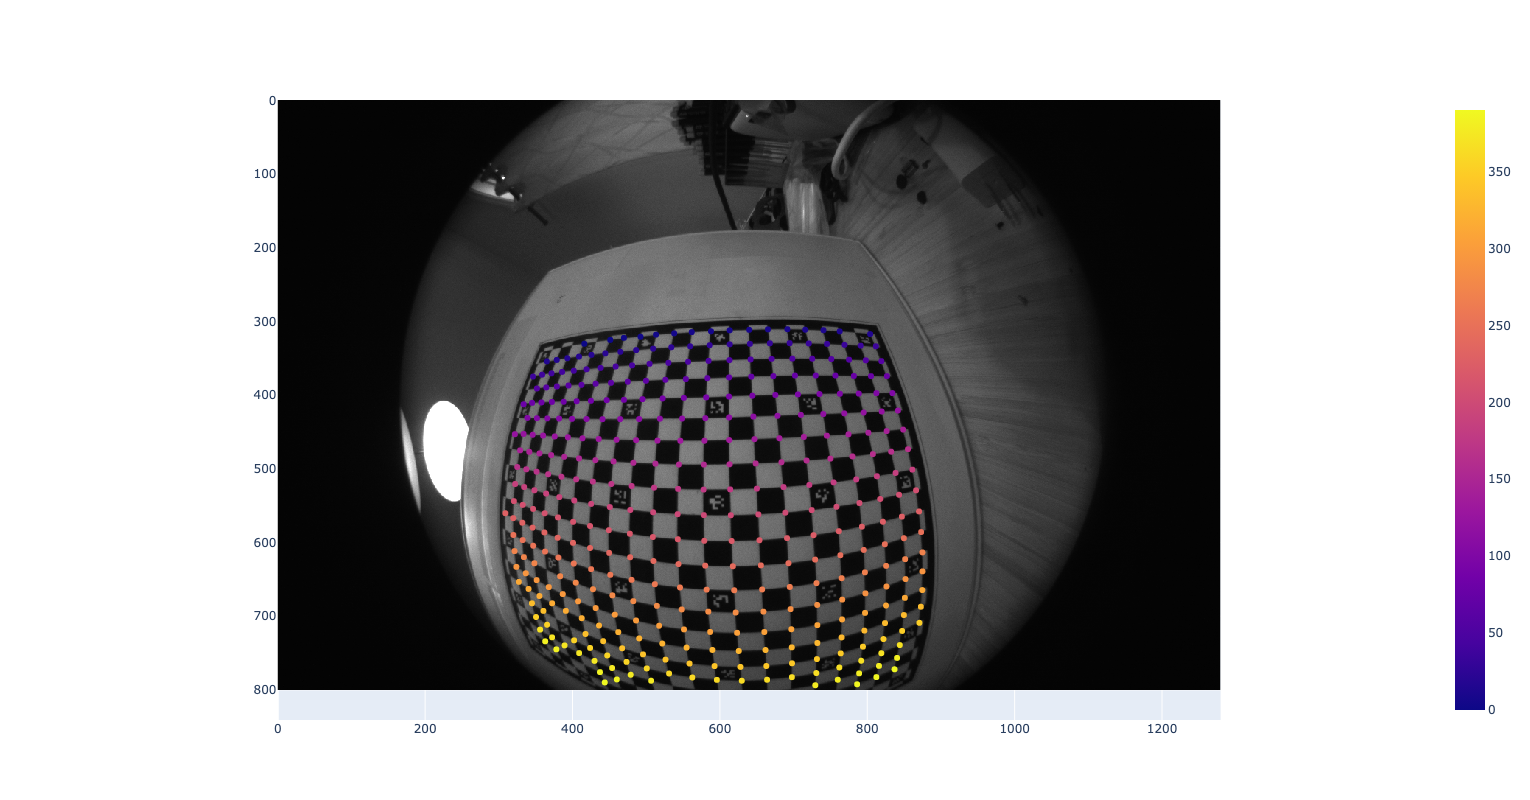

In [13]:
el = df.loc[1016]
show_corners(el["input.image"], el["features.corners"]).update_layout(height=800)
show_boards(
    el["input.image"], el["features.corners"], el["features.board"]
).update_layout(height=800)

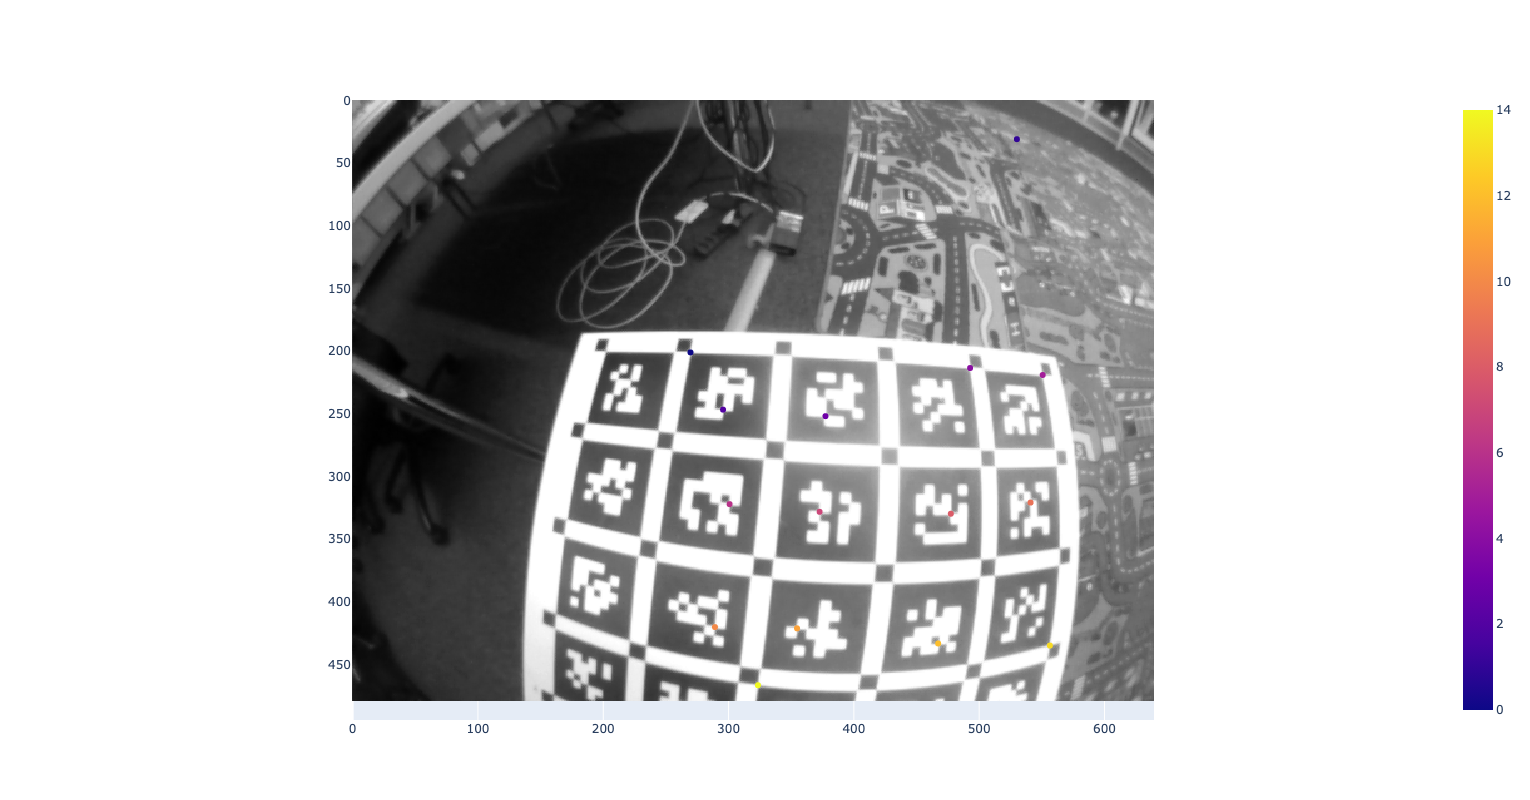

In [14]:
el = df.loc[328]
show_corners(el["input.image"], el["features.corners"]).update_layout(
    # autosize=False,
    # width=800,
    height=800,
)
show_boards(
    el["input.image"], el["features.corners"], el["features.board"]
).update_layout(height=800)

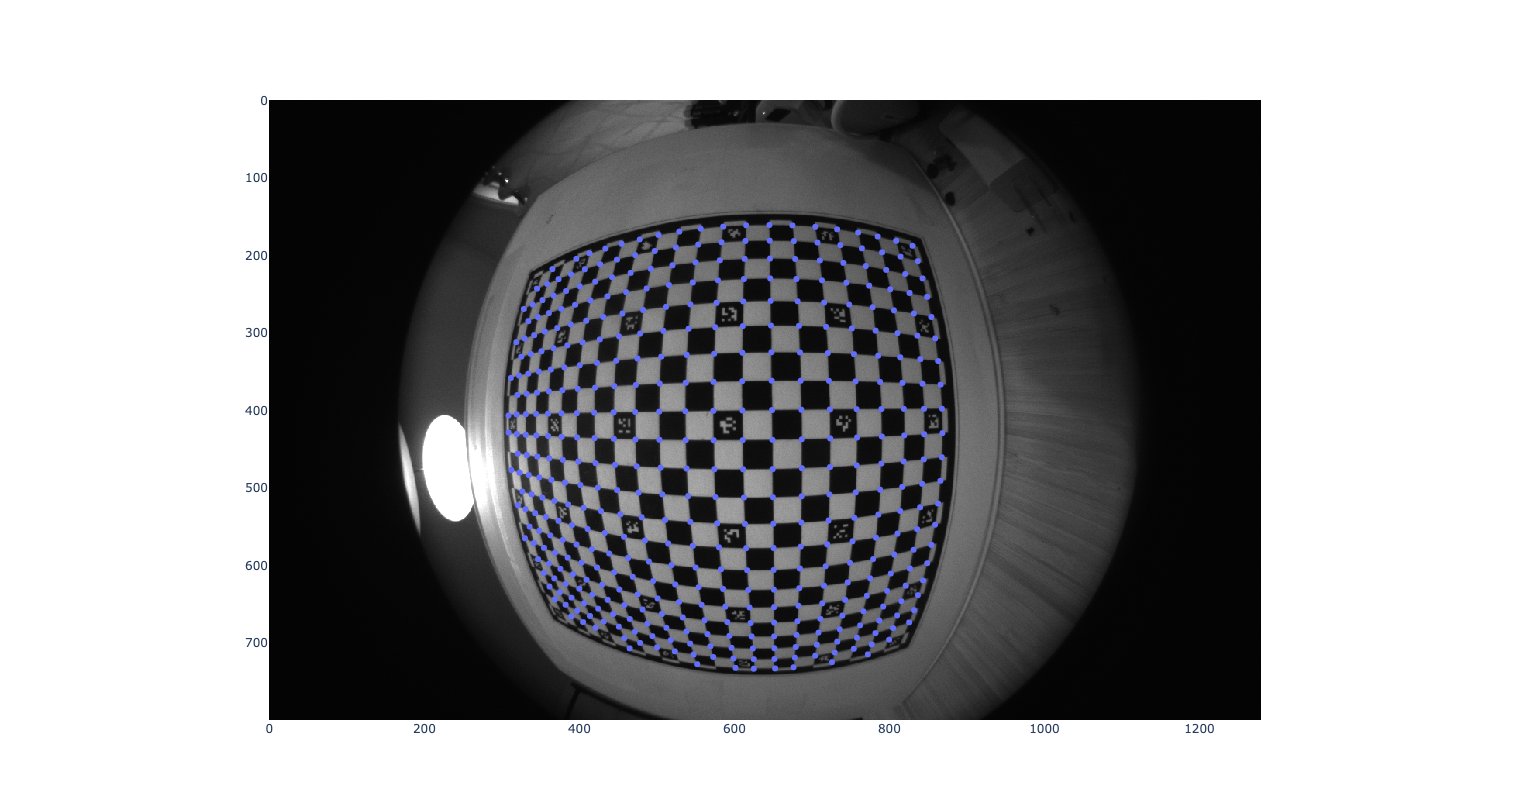

In [63]:
el = df_.iloc[352]
corners_ = np.array([[d["x"], d["y"]] for d in el["input.corners"]])
show_corners(el["input.image"], corners_).update_layout(
    # autosize=False,
    # width=800,
    height=800,
)
# show_boards(
#     el["input.image"], el["features.corners"], el["features.board"]
# ).update_layout(height=800)